In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation

from neural_network import NeuralNetworkImpl
from utils import compute_accuracy_multilabel

In [7]:
# Generate train and test datasets, as plotted below.
np.random.seed(12)
num_samples = 10000

negative_points1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], int(num_samples/2))
negative_points2 = np.random.multivariate_normal([2, 7], [[1, .75],[.75, 1]], int(num_samples/2))
positive_points = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_samples)

all_points = np.vstack((negative_points1[:int(num_samples/4)],
    negative_points2[:int(num_samples/4)],
    positive_points[:int(num_samples/2)])).astype(np.float32)
point_labels = np.hstack((np.repeat([[1,0,0]], int(num_samples/4), axis=0).T,
                          np.repeat([[0,1,0]], int(num_samples/4), axis=0).T,
                          np.repeat([[0,0,1]], int(num_samples/2), axis=0).T))

test_points = np.vstack((negative_points1[int(num_samples/4):],
    negative_points2[int(num_samples/4):],
    positive_points[int(num_samples/2):])).astype(np.float32)
test_labels = np.hstack((np.repeat([[1,0,0]], int(num_samples/4), axis=0).T,
                         np.repeat([[0,1,0]], int(num_samples/4), axis=0).T,
                         np.repeat([[0,0,1]], int(num_samples/2), axis=0).T))

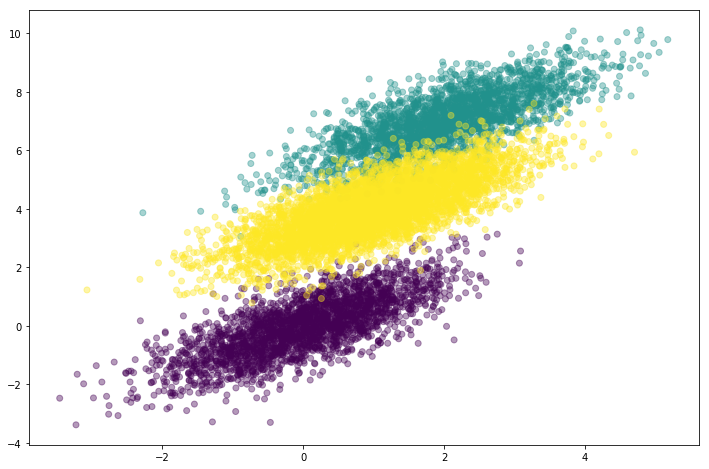

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(all_points[:, 0], all_points[:, 1], c = np.argmax(point_labels, axis=0), alpha = .4)
plt.show()

Two of the groups of points are intentionally closer together to make it hard to fit a function that separates them.

Parameters to train: 103
=== iteration 0, cost: 2.3102110032037793, accuracy: 0.53125
=== iteration 10, cost: 0.17821759496037598, accuracy: 0.90625
=== iteration 20, cost: 0.30928440648756955, accuracy: 0.90625
=== iteration 30, cost: 0.05802689533907409, accuracy: 1.0
=== iteration 40, cost: 0.1386155081558939, accuracy: 0.96875
=== iteration 50, cost: 0.12162544555014265, accuracy: 0.9375
=== iteration 60, cost: 0.20670549880143602, accuracy: 0.9375
=== iteration 70, cost: 0.1162591289173028, accuracy: 0.9375
=== iteration 80, cost: 0.046521513621210375, accuracy: 1.0
=== iteration 90, cost: 0.105823131386306, accuracy: 0.96875
=== iteration 100, cost: 0.11029097541997757, accuracy: 0.96875
=== iteration 110, cost: 0.07282955406914234, accuracy: 0.96875
=== iteration 120, cost: 0.017462389095535907, accuracy: 1.0
=== iteration 130, cost: 0.0385177809033514, accuracy: 1.0
=== iteration 140, cost: 0.07373271327098666, accuracy: 0.96875
=== iteration 150, cost: 0.02734644679490366, acc

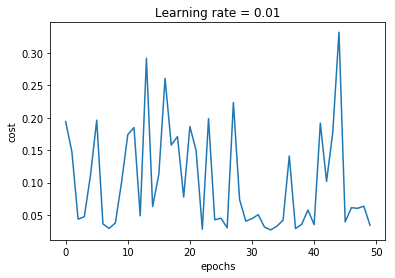

Neural net model test accuracy: 0.9715000000000004


In [9]:
model_nn = NeuralNetworkImpl(layer_sizes=[10, 5, 3], layer_activations=['relu', 'relu', 'softmax'],
    alpha=0.01, epochs=500, mini_batch_size=32, regularization=0.1, optimization_algorithm='adam')
model_nn.train(all_points.T, point_labels)
accuracy = compute_accuracy_multilabel(model_nn, test_points.T, test_labels)
print("Neural net model test accuracy: {}".format(accuracy))

In [10]:
model = Sequential()
model.add(Dense(10, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(all_points, point_labels.T, epochs=500, batch_size=32, verbose=0)
score = model.evaluate(test_points, test_labels.T, batch_size=32)
print("\nKeras NN loss/accuracy:")
for label, value in zip(model.metrics_names, score):
    print("{}: {}".format(label, value))

 9696/10000 [============================>.] - ETA: 0s
Keras NN loss/accuracy:
loss: 0.08085204473934136
acc: 0.9692
